******Leaky Integrate-fire Model******

\begin{equation}
\tau_m \frac{d}{dt} V(t) = E_L - V(t) + R I(t) \quad \text{if} \quad V(t) \leq V_{th}
\end{equation}
\begin{equation}



In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [4]:
t_max = 150e-3 #seconds
dt = 1e-3 #seconds
tau = 20e-3 #seconds membrane time constant
el = -60e-3 #milivolt leak potential
vr = -70e-3 #milivolt 
vth = -50e-3 #milivolt
r = 100e6 #ohm
i_mean = 25e-11 #ampre

print (t_max, dt, tau, el, vr, vth, r, i_mean)


0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


\begin{equation}
I(t) = I_{\text{mean}} \left( 1 + \sin\left(\frac{2\pi}{0.01} t\right) \right)
\end{equation}

In [13]:
'''for loop usage: Modling sinusoidal function'''
for step in range (10): #the range() function does not allow float as parameter
    t = step * dt #increment is defined as dt = 1e-3 
    i = i_mean * (1 + np.sin((2 * np.pi * t)/0.01))
    
    print(f"{t:.3f}","Current",f"{i:.4e}")



0.000 Current 2.5000e-10
0.001 Current 3.9695e-10
0.002 Current 4.8776e-10
0.003 Current 4.8776e-10
0.004 Current 3.9695e-10
0.005 Current 2.5000e-10
0.006 Current 1.0305e-10
0.007 Current 1.2236e-11
0.008 Current 1.2236e-11
0.009 Current 1.0305e-10


In [9]:
'''Print Formatting'''
x = 3.1415926e-1
print(f'{x:.3f}') #3 decimal float
print(f"{x:.4e}") #4 decimal in scientific form


0.314
3.1416e-01


In [15]:
'''For Loop'''
for step in [0, 1, 2]:
  print(step)

for step in range(3):
  print(step)

start = 0
end = 3
stepsize = 1

for step in range(start, end, stepsize):
  print(step)

0
1
2
0
1
2
0
1
2


0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


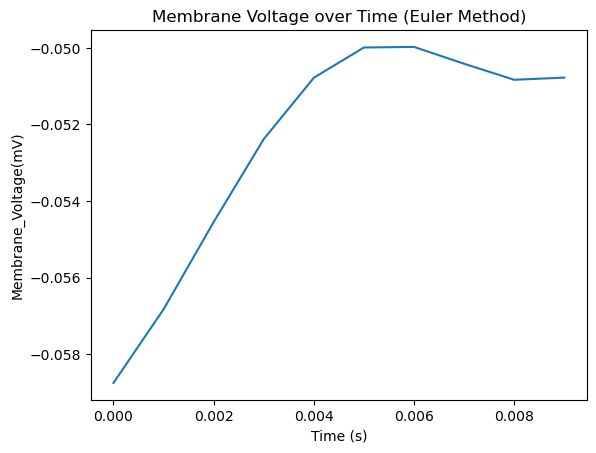

In [23]:
'''Integrating the LIF differential equation using euler's method'''
'''Plotting current over time diagram'''

#Initialize step_end and v0
step_end = 10
v = el

v_ins = []

#Initializaing the Plot
plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Membrane_Voltage(mV)')
plt.title('Membrane Voltage over Time (Euler Method)')

#Loop for step_end steps
for step in range (step_end):
    #compute value of t
    t = step * dt

    #Compute value of i at this time step
    i = i_mean * (1 + np.sin((t * 2 * np.pi)/0.01))

    #Compute v
    v = v  + (dt * (el - v + r * i))/ tau 

    print(f"{t:.3f} {v:.4e}")
    v_ins.append((t, v))


plt.plot([result[0] for result in v_ins], [result[1] for result in v_ins])
plt.show()



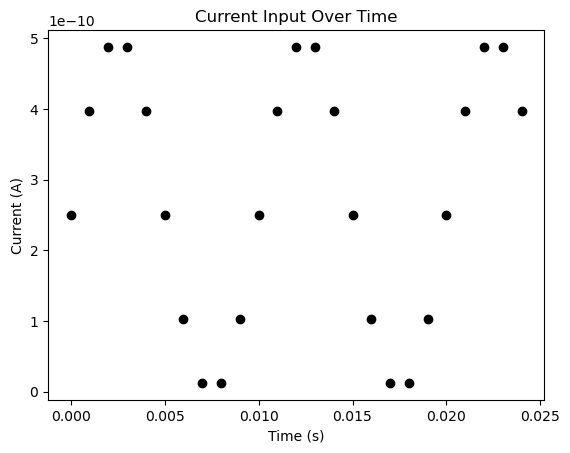

In [26]:
'''Plotting the sinusoidal current input'''
#Initialize Step_end
step_end = 25

#Initialize Plot
plt.figure
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Current Input Over Time')

#loop current in step_end
for step in range (step_end):

    #Compute value of t
    t = step * dt

    #Compute value of t
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

    # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
    plt.plot(t, i, 'ko')

plt.show()


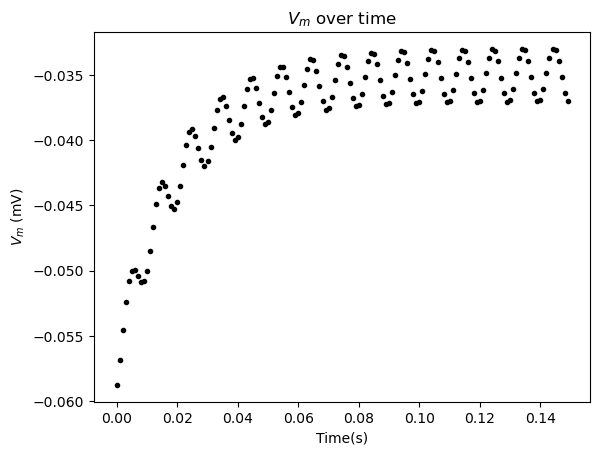

In [31]:
'''Ploting Membrane Potential'''
#Initialize Step Size
step_end = int(t_max / dt)

#Initialize resting membrance potential
v = el

#Initilizing the plot
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('$V_m$ (mV)')
plt.title('$V_m$ over time')

for step in range (step_end):
    
    #Computing time
    t = step * dt

    #Computing current
    i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

    #Computing Voltage
    v = v  + (dt * (el - v + r * i))/ tau 

    #valuating the plot
    plt.plot(t, v, "k.")

plt.show()



**Stochastic Stimulation**

$$
\begin{equation}
I(t) = I_{\text{mean}} \left( 1 + 0.1 \sqrt{\frac{t_{\text{max}}}{\Delta t}} \, \xi(t) \right) \quad \text{with} \quad \xi(t) \sim U(-1, 1)
\end{equation}
$$



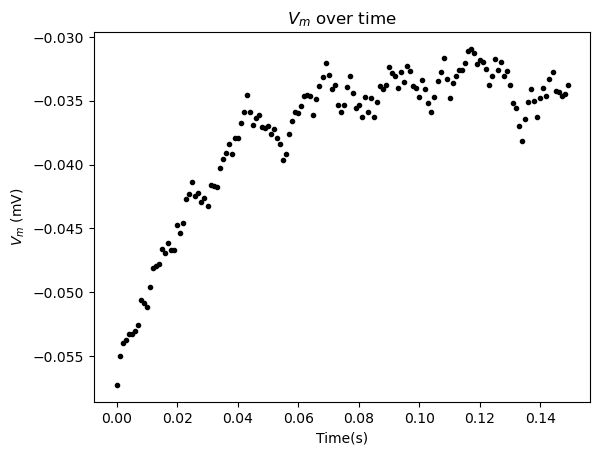

In [39]:
'''Incorporating Stochastic process into synapic input modeling '''

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size
step_end = int(t_max / dt)

#Initialize resting membrance potential
v = el

#Initilizing the plot
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('$V_m$ (mV)')
plt.title('$V_m$ over time')

for step in range (step_end):
    
    #Computing time
    t = step * dt

    #Get Random Number
    random_num = np.random.uniform(-1, 1)
    
    #Computing current
    i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * random_num)

    #Computing Voltage
    v = v  + (dt * (el - v + r * i))/ tau 

    #valuating the plot
    plt.plot(t, v, "k.")

plt.show()


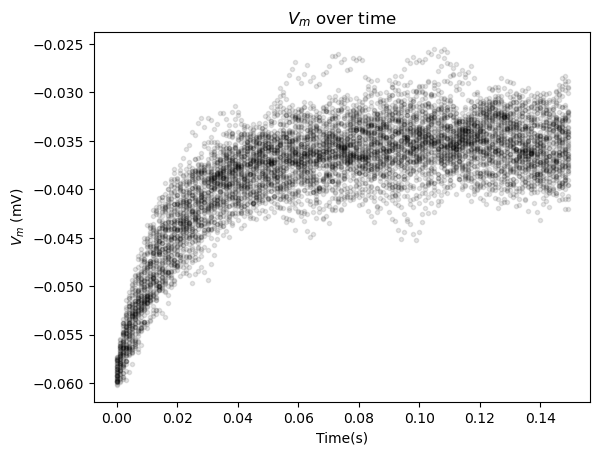

In [16]:
'''Simulating multiple trials and storing simulations in lists'''

import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size
step_end = int(t_max / dt)
n = 50 #Number of Trials

#Initialize resting membrance potential
v_n = [el] * n

#Initilizing the plot
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('$V_m$ (mV)')
plt.title('$V_m$ over time')

for step in range (step_end):
    
    #Computing time
    t = step * dt

    #Loop each time point by n times
    for j in range (0, n):

        #Get Random Number
        random_num = np.random.uniform(-1, 1)

         #Computing current
        i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * random_num)

        #Computing Voltage
        v_n[j] = v_n[j]  + (dt * (el - v_n[j] + r * i))/ tau 


    #Plot all simulations (alpha = 0.1 make the marker transparent)
    plt.plot([t] * n , v_n, 'k.', alpha = 0.1)


plt.show()



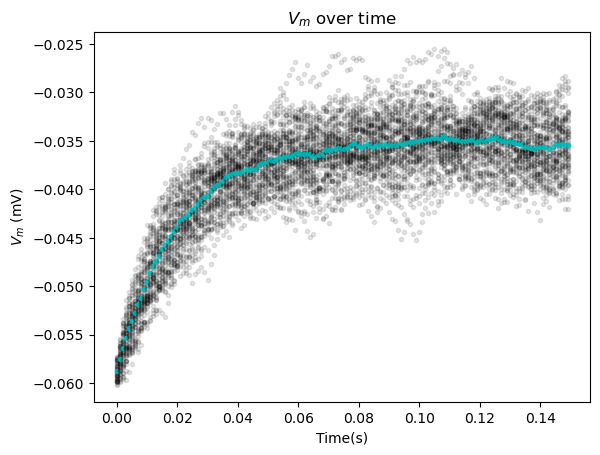

In [22]:
'''Plotting Sample Mean for the 50 simulations'''

import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size
step_end = int(t_max / dt)
n = 50 #Number of Trials

#Initialize resting membrance potential
v_n = [el] * n

#Initilizing the plot
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('$V_m$ (mV)')
plt.title('$V_m$ over time')

for step in range (step_end):
    
    #Computing time
    t = step * dt

    #Loop each time point by n times
    for j in range (0, n):

        #Get Random Number
        random_num = np.random.uniform(-1, 1)

         #Computing current
        i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * random_num)

        #Computing Voltage
        v_n[j] = v_n[j]  + (dt * (el - v_n[j] + r * i))/ tau 

        #Calculating Average Membrane Voltage from the 50 trials
        v_mean = sum(v_n)/50


    #Plot all simulations (alpha = 0.1 make the marker transparent)
    plt.plot([t] * n , v_n, 'k.', alpha = 0.1)

    #Plot averages
    plt.plot(t , v_mean, 'c.', alpha = 0.8)


plt.show()



\begin {equation}
\text{Var}(t) = \frac{1}{N-1} \sum_{n=1}^{N} \left( V_n(t) - \overline{V(t)} \right)^2
\end{equation}

\begin {equation}
\sigma  = \sqrt{\text{Var}(t)}
\end {equation}

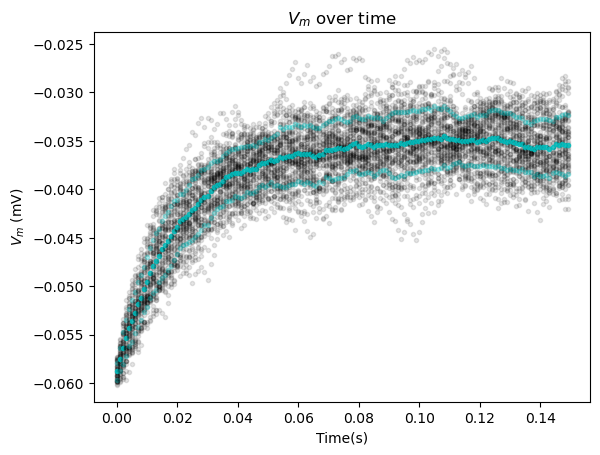

In [25]:
'''Plotting Sample Standard Deviation'''

'''Plotting Sample Mean for the 50 simulations'''

import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size
step_end = int(t_max / dt)
n = 50 #Number of Trials

#Initialize resting membrance potential
v_n = [el] * n

#Initilizing the plot
plt.figure()
plt.xlabel('Time(s)')
plt.ylabel('$V_m$ (mV)')
plt.title('$V_m$ over time')

for step in range (step_end):
    
    #Computing time
    t = step * dt

    #Loop each time point by n times
    for j in range (0, n):

        #Get Random Number
        random_num = np.random.uniform(-1, 1)

         #Computing current
        i = i_mean * (1 + 0.1 * np.sqrt(t_max/dt) * random_num)

        #Computing Voltage
        v_n[j] = v_n[j]  + (dt * (el - v_n[j] + r * i))/ tau 

    #Compute Sample Mean
    v_mean = sum(v_n)/50


    #Compute Sample variance
    v_var = sum((v_n[j] - v_mean) ** 2 for j in range (n))/(n-1)
    
    #Compute Sample Standard of Deviation
    v_std = np.sqrt(v_var)

    #Plot all simulations (alpha = 0.1 make the marker transparent)
    plt.plot([t] * n , v_n, 'k.', alpha = 0.1)

    #Plot averages
    plt.plot(t , v_mean, 'c.', alpha = 0.8)

    #plot Mean + SD
    plt.plot(t, v_mean + v_std, 'c.', alpha = 0.3)

    #plot Mean - SD
    plt.plot(t, v_mean - v_std, 'c.', alpha = 0.3)



plt.show()



**Using Numpy.array**

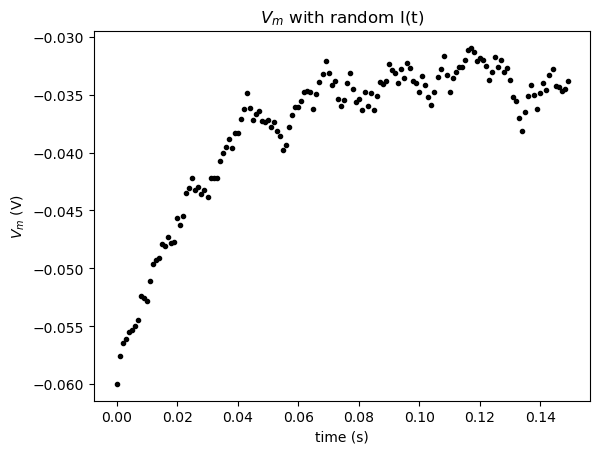

In [32]:
import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size, t_range, and V
step_end = int(t_max / dt)
n = 50 #Number of Trials
t_range = np.linspace(0, t_max, num = step_end, endpoint= False)
v = el * np.ones(step_end)


# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step-1] + (dt / tau) * (el - v[step-1] + r * i[step])
    #the voltage in the equation is v[step-1] because the previous voltage is used to calculate the current


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
plt.plot(t_range, v, 'k.')
plt.show()



Enumerate to iterate over the indexes and values of the synaptic current array i. We want to get the step and the value of i at that step i_step

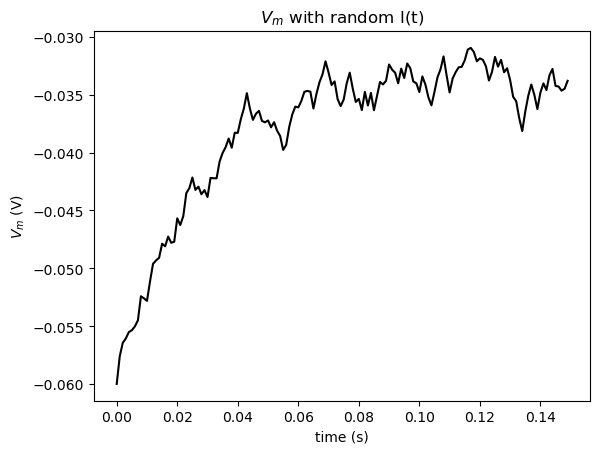

In [ ]:
import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size, t_range, and V
step_end = int(t_max / dt)
n = 50 #Number of Trials
t_range = np.linspace(0, t_max, num = step_end, endpoint= False)
v = el * np.ones(step_end)


# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step, i_step in enumerate(i): #In addition to the step (indexing of loop), enumerate also allow the i array to pair with index

  if step == 0:
    continue

  v[step] = v[step-1] + (dt / tau) * (el - v[step-1] + r * i_step)
    #the voltage in the equation is v[step-1] because the previous voltage is used to calculate the current


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
plt.plot(t_range, v, 'k') #'k' = Continuous line, 'k.' = dotted line 
plt.show()



**Aggregation and Numpy.array**
1 dimensional array e.g. a = np.array([1,2,3])
2 dimensional array e.g. b = np.array([[1,2,3]]) or c = np.array ([[1,2,3],[1,2,3]])
b not equal to c

**Array axis notation:**
    2D array
        Column: axis= 0
        Row: axis =1

**Operation in Array**
Product of row: np.prod(a, axis=1)
product of column: np.prod(b, axis =0)

**Matrix Transpose**
e.g. a.T

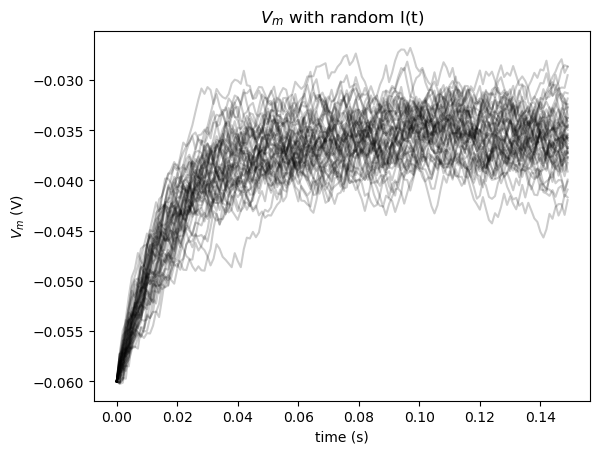

In [ ]:
import numpy as np

#Randomness Generator 
np.random.seed(2020)

#Initialize Step Size, t_range, v, and i
step_end = int(t_max / dt)
n = 50 #Number of Trials
t_range = np.linspace(0, t_max, num = step_end, endpoint= False)
v = el * np.ones([n, step_end])
i = np.array([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random((n, step_end)) - 1))


for step in range(1, step_end):

  v[:, step] = v[:, step-1] + (dt / tau) * (el - v[:, step-1] + r * i[:, step])

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
plt.plot(t_range, v.T, 'k', alpha =0.2) #'k' = Continuous line, 'k.' = dotted line 
plt.show()



**Plotting SD using Numpy**

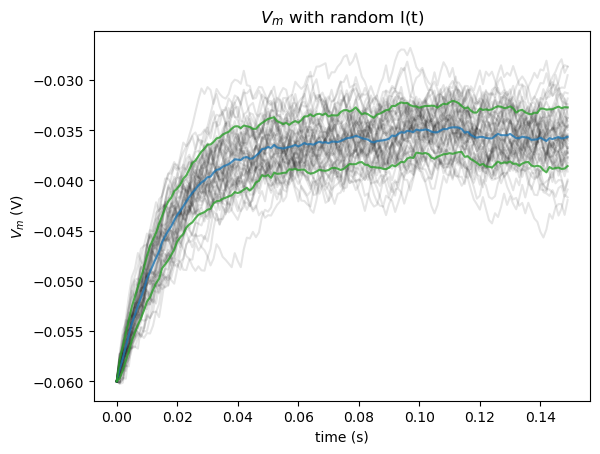

In [61]:
import numpy as np

#Randomness Generator
np.random.seed(2020)

#Initialize Step Size, t_range, v, and i
step_end = int(t_max / dt)
n = 50 #Number of Trials
t_range = np.linspace(0, t_max, num = step_end, endpoint= False)
v_n = el * np.ones([n, step_end])
i = np.array([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random((n, step_end)) - 1))


for step in range(1, step_end):

  v_n[:, step] = v_n[:, step-1] + (dt / tau) * (el - v_n[:, step-1] + r * i[:, step])

#Calculating the mean of sample
v_mean = np.mean(v_n, axis = 0)

#calculating the SD of Sample
v_std = np.std(v_n, axis =0)


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
plt.plot(t_range, v_n.T, 'k', alpha=0.1, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C2', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C2', alpha=0.8, label='mean $\pm$ std')
plt.show()

